# Student Performance Indicator

## 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


## 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import csv data as pandas dataframe
df=pd.read_csv("data/stud.csv")
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

### 2.2 Dataset information

This data set consists of the marks secured by the students in various subjects.
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3) Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Insights
- There are no missing values in the data set

### 3.2 Check Duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

There are no duplicates  values in the data set

### 3.3 Check data types

In [6]:
#check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights
- From above description of numerical data, all "means" are very close to each other (between 66 and 68.05)
- All "standard deviations" are also close (between 14.6 and 15.19)
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading= 17

### 3.6 Check various categories present in the different categorical column

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Adding columns for "Total Score" and "Average"

In [12]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
- From the above values, we can see that students have performed the worst in Maths. The best performance is in the reading section.

## 4) Exploring Data ( Visualization )


### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

##### Plots a histogram of the "average" column

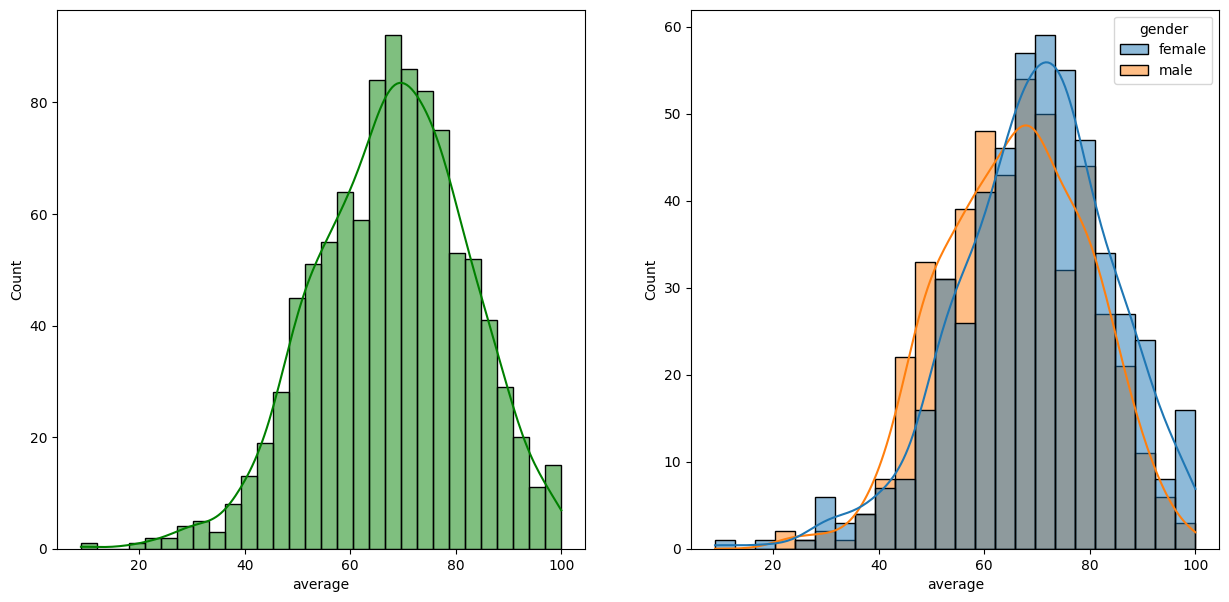

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df,x='average',kde=True,hue='gender', ax=axs[1])
plt.show()

##### Plots a histogram of the "total score" column

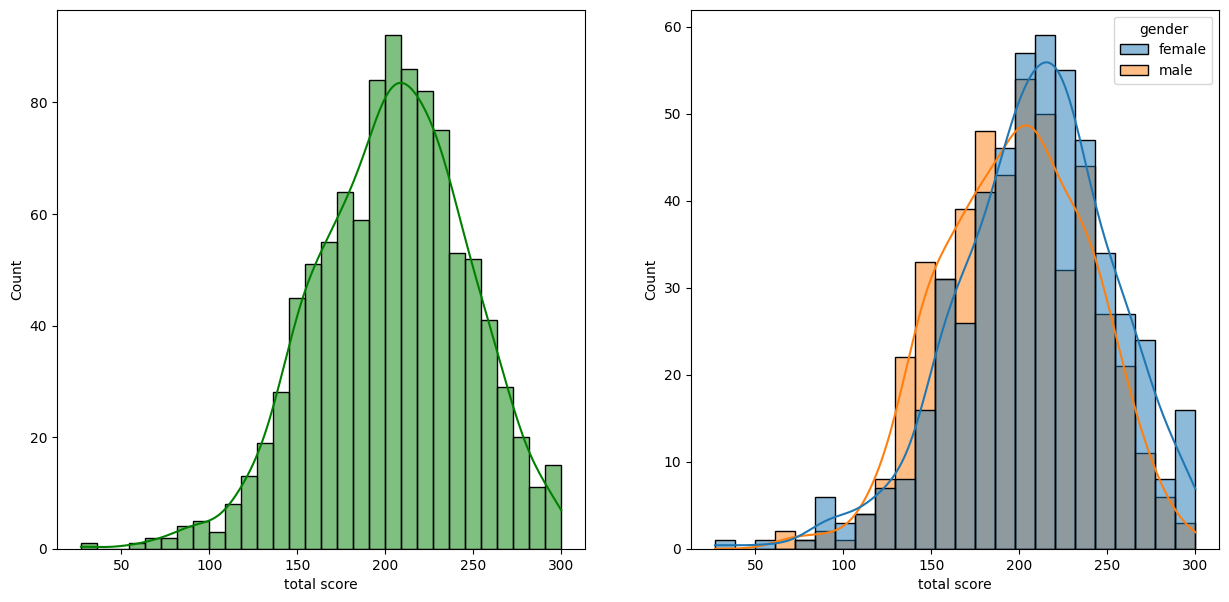

In [16]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

 Insights :-
Female students tend to perform well then male students.

##### Distribution of "Average" Scores by "Lunch" Type and "Gender"

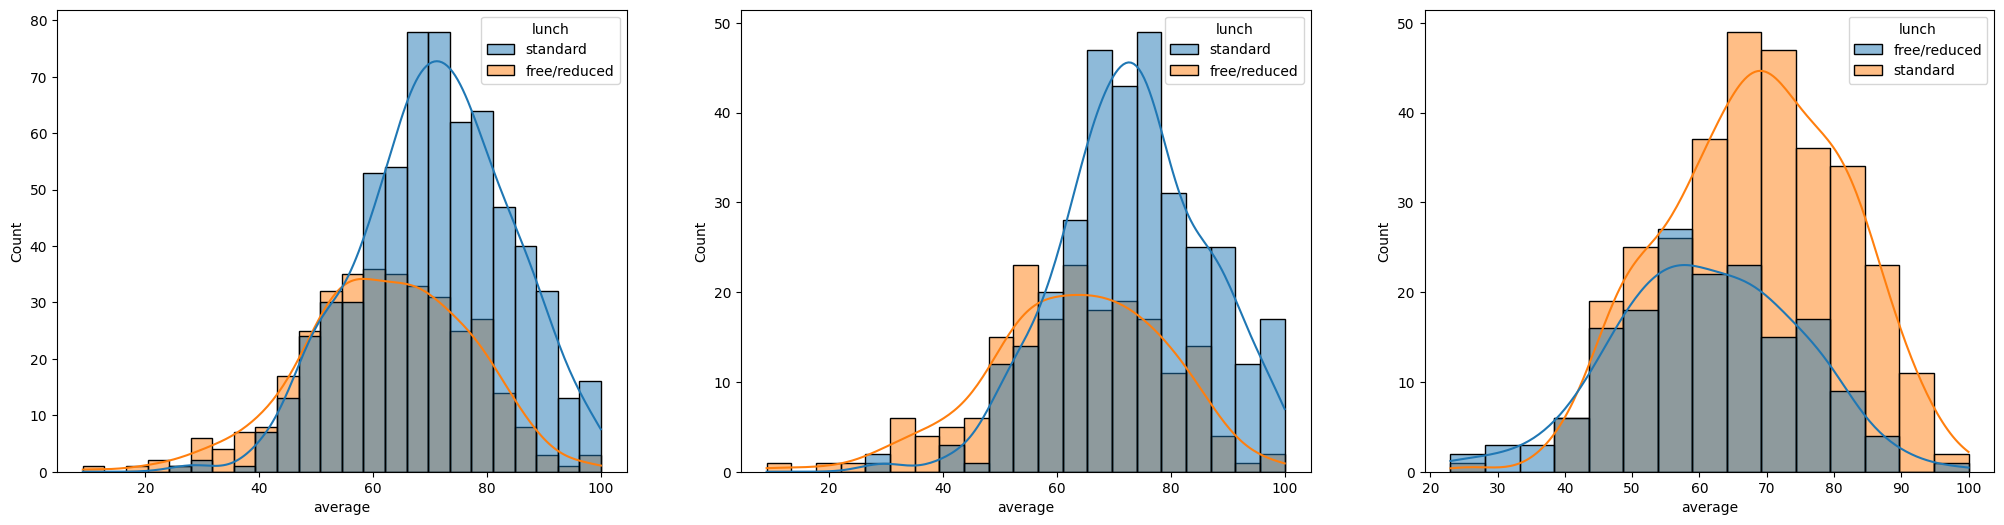

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

##### Distribution of "Average" Scores by "parental_level_of_education"  and "Gender"

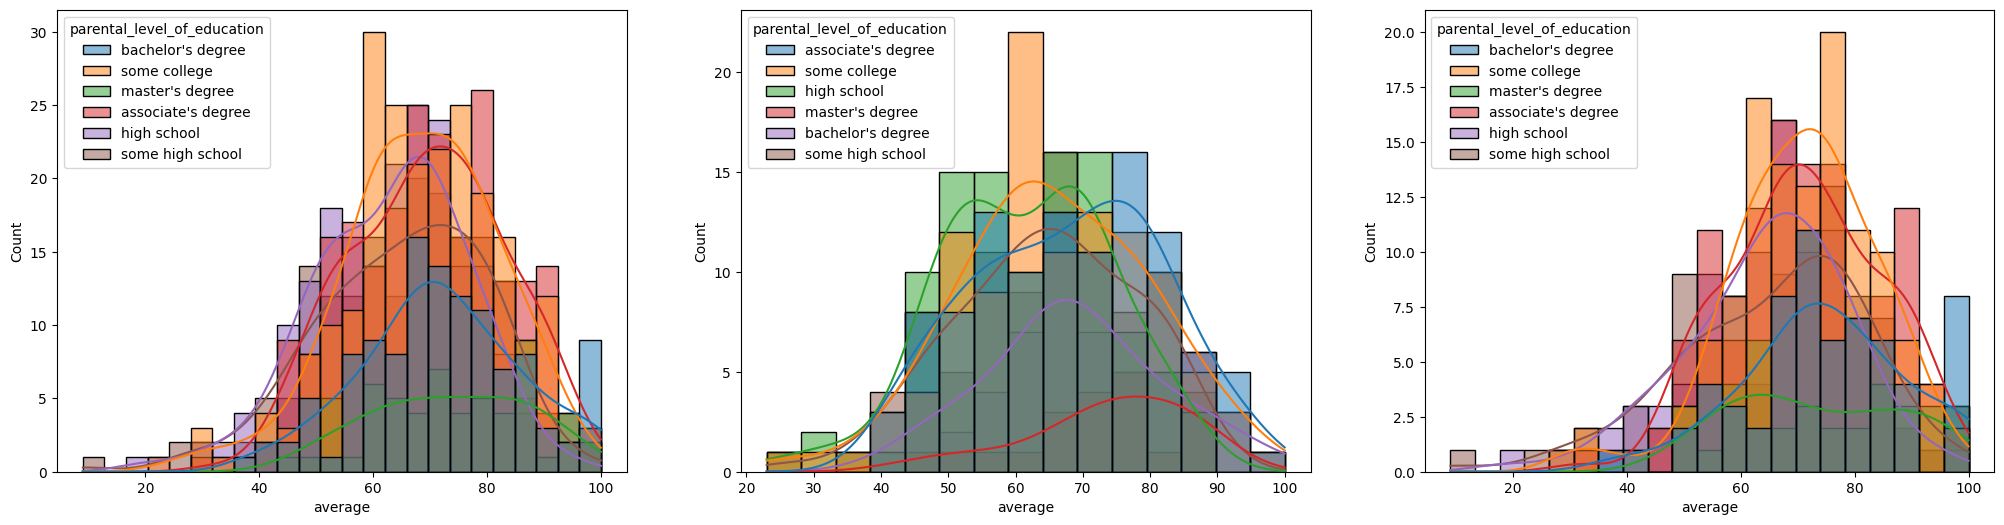

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights
- Students whose parents only completed some high school or high school (purple and orange, respectively) have a wider spread toward lower scores.
- While parental education is not the sole factor determining student performance, students with parents who have higher educational attainment (bachelor's or master's degrees) do tend to perform better, especially for male students. Female students also show better performance with higher parental education, though the effect might be less strong in comparison.


##### Distribution of "Average" Scores by "race_ethnicity" and "Gender"

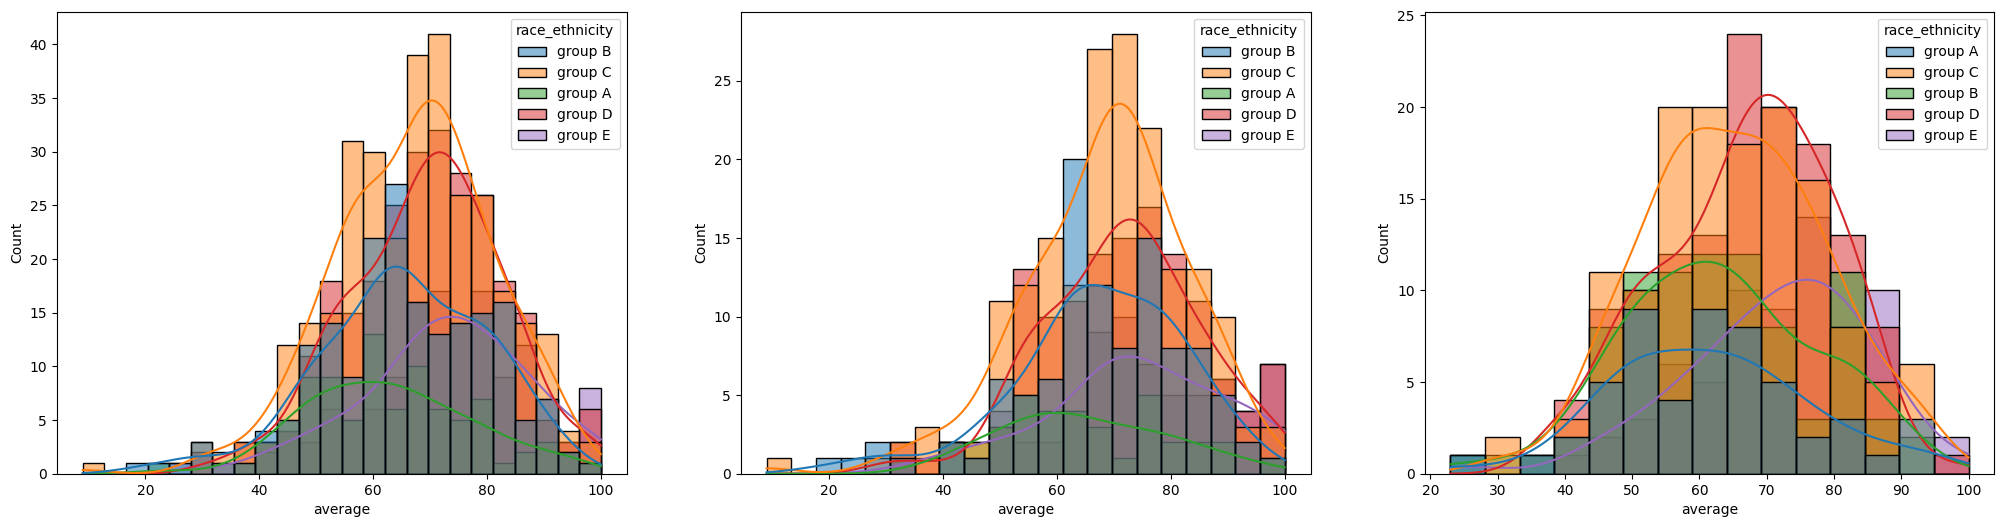

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female
- Group C females showing a tendency for higher scores compared to the other groups.
- Group C and D males tend to have higher average scores, while other groups like Group A and Group B have lower average scores.

##### Distribution of "Average" Scores by "test_preparation_course"  and "Gender"

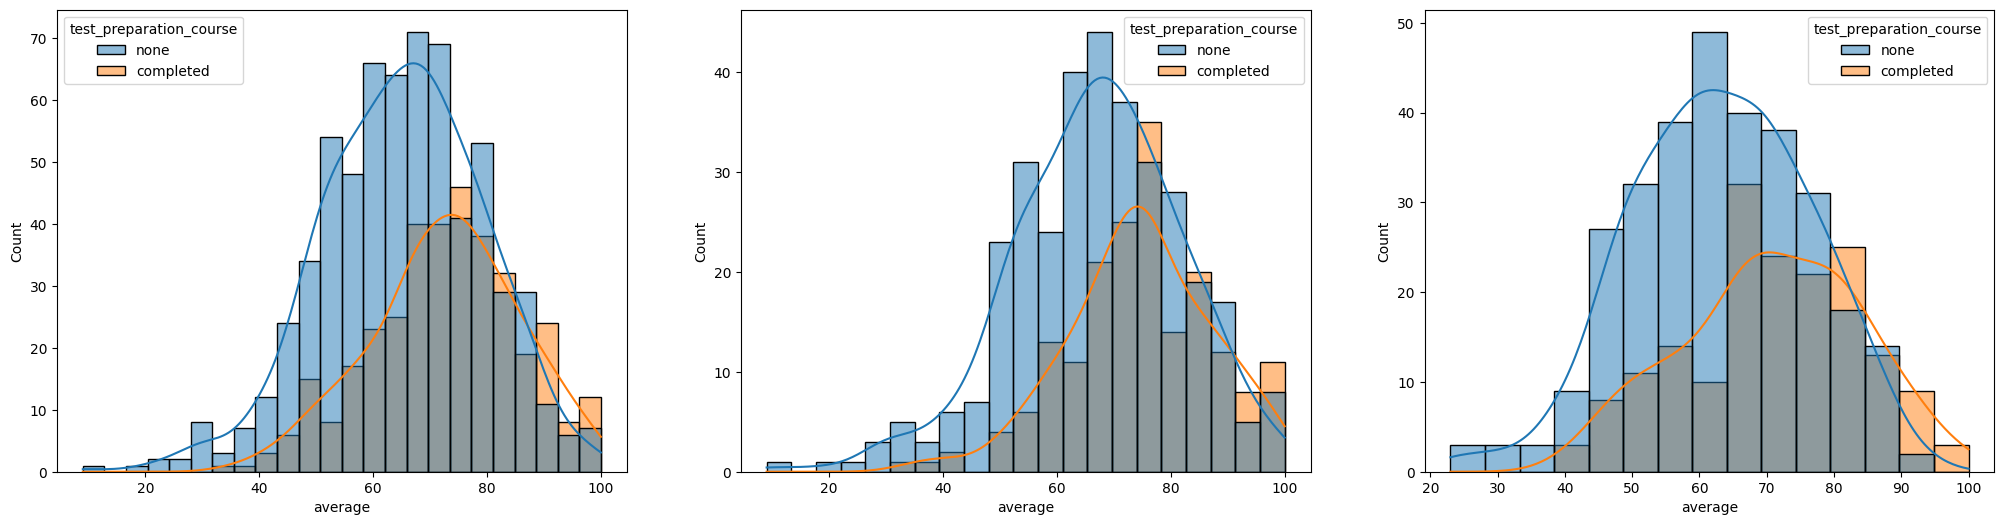

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='test_preparation_course')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test_preparation_course')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test_preparation_course')
plt.show()

insights:
- The KDE curves and histograms suggest that completing the test preparation course is associated with higher average scores across both male and female students
- (All Students) PLOT: The "completed" group (orange) generally scores higher, while the "none" group (blue) is centered more toward the middle.
- Female students who completed the test preparation course seem to have higher average scores, as indicated by the orange KDE curve and the rightward shift of the histogram compared to the "none" group.
- male students who completed the course having a higher average score distribution compared to those who did not

### 4.2 Maximumum score of students in all three subjects

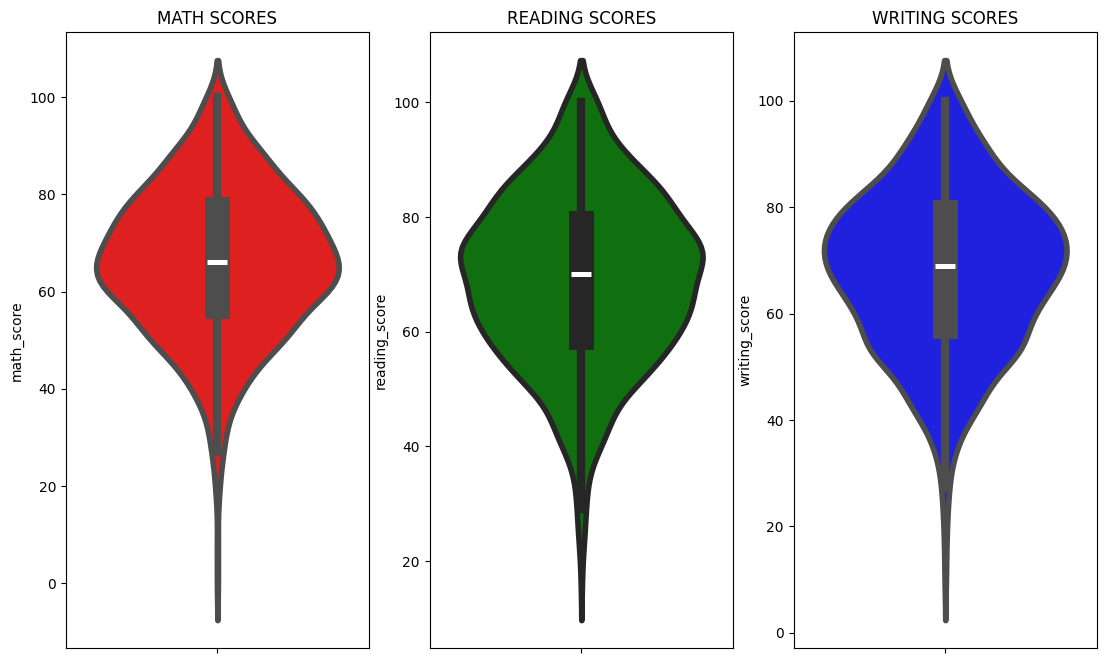

In [21]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=4)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=4)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=4)

plt.show()

Insights
- From the above three plots its clearly visible that most of the students score in between 50-80

### 4.3 Multivariate analysis using pieplot

Text(0.5, 1.0, 'Parental Education')

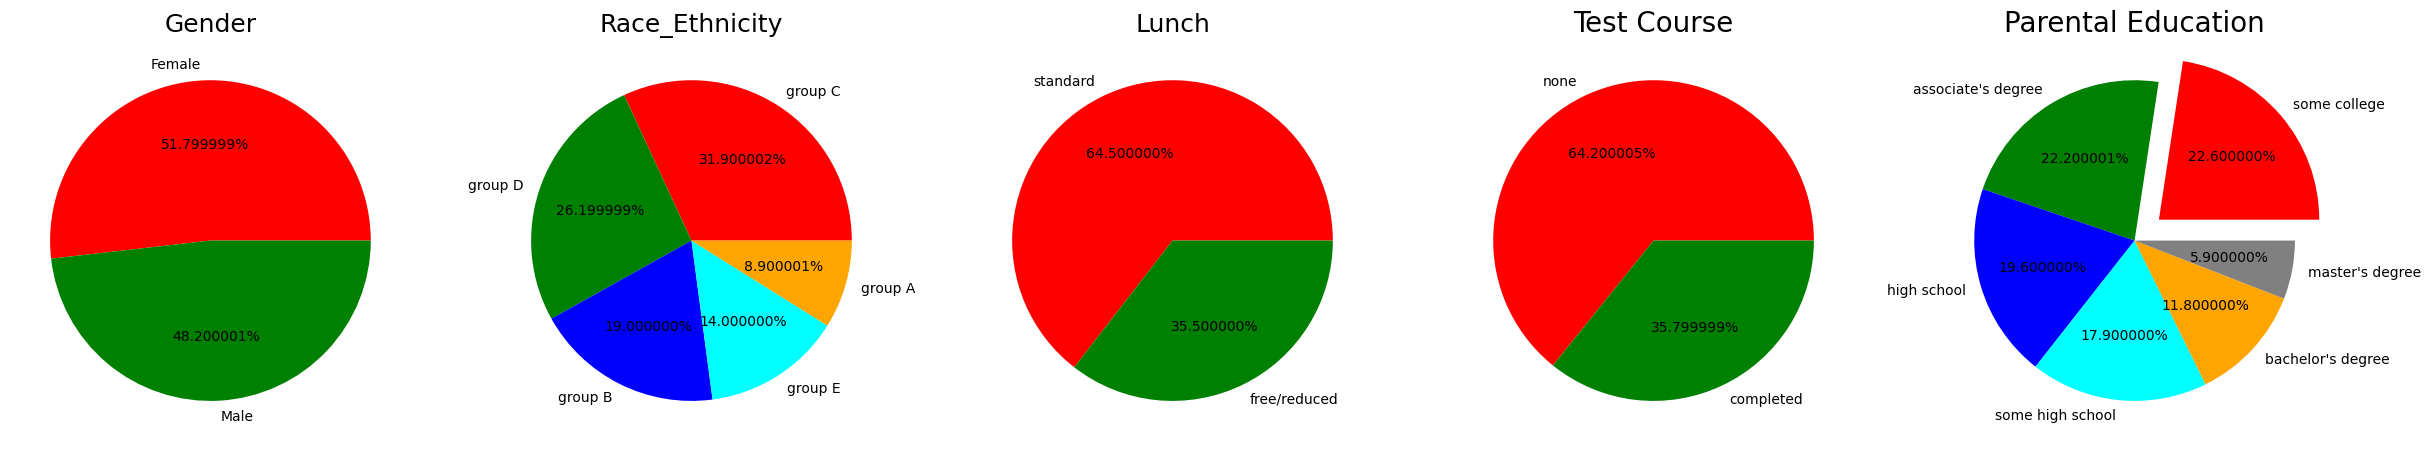

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender', fontsize = 18)

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group C','group D','group B','group E','group A'
color=['red', 'green', 'blue', 'cyan','orange']
plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Race_Ethnicity', fontsize = 18)

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard','free/reduced'
color = ['red','green']
plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Lunch', fontsize = 18)

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='none','completed'
color = ['red','green']
plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Test Course', fontsize = 20)

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels='some college',"associate's degree",'high school','some high school',"bachelor's degree","master's degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size,labels=labels,colors=color,autopct='%2f%%',explode=(0.2,0,0,0,0,0))
plt.title('Parental Education', fontsize = 20)

Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization


#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

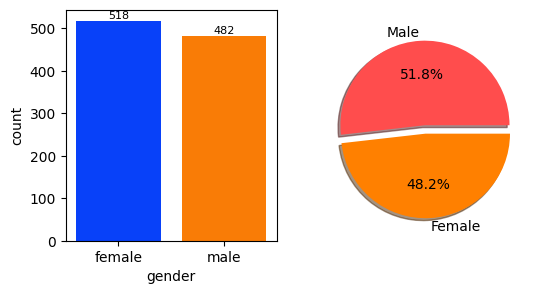

In [23]:
f,ax=plt.subplots(1,2,figsize=(6,3))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=8)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [24]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [25]:
gender_group = df.groupby('gender').mean(numeric_only=True)

gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


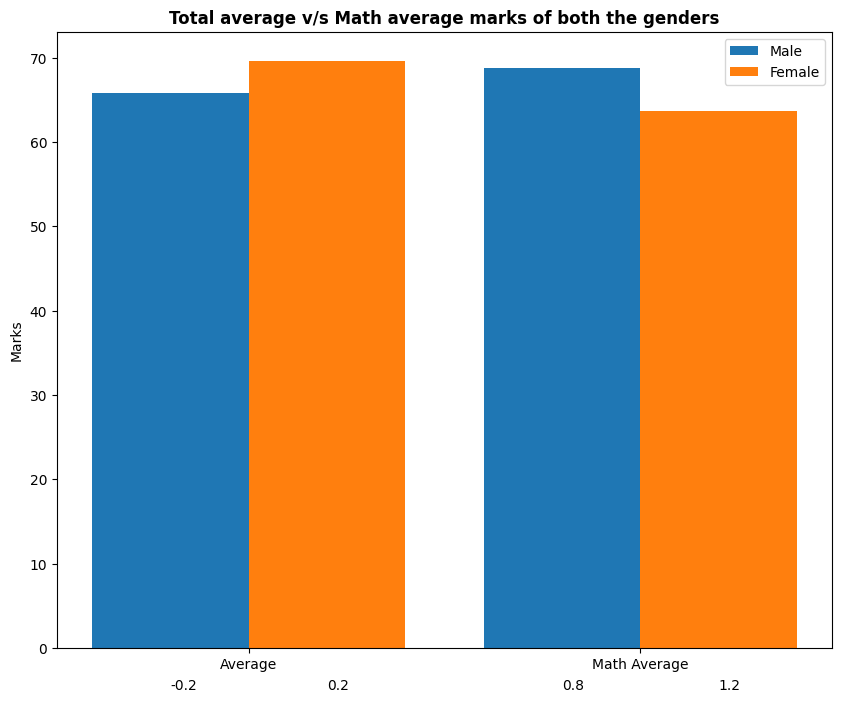

In [26]:
plt.figure(figsize=(10, 8))

X = ['Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

#Creating the Bar Plot:
X_axis = np.arange(len(X))
#print(X_axis)  #O/P=[0 1]
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')     # 0 - 0.2= -0.2  and  1 - 0.2=0.8
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female') # 0 + 0.2= 0.2   and  1 + 0.2= 1.2

# Add annotations for x-axis positions
for i in X_axis:
    plt.text(i - 0.2, -5, f'{i-0.2}') # -5 is used to position the text below the x-axis to ensure it's visible and does not overlap with the bars in the plot
    plt.text(i + 0.2, -5, f'{i+0.2}')
    

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()
plt.show()

Insights 
- females have a better overall avg score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

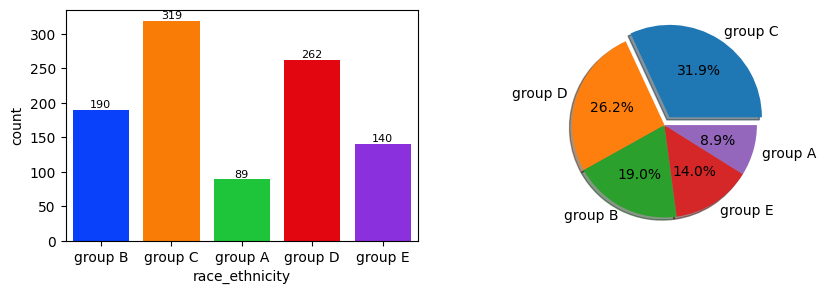

In [27]:
f,ax= plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=8)
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ethnicity has any impact on student's performance ? )

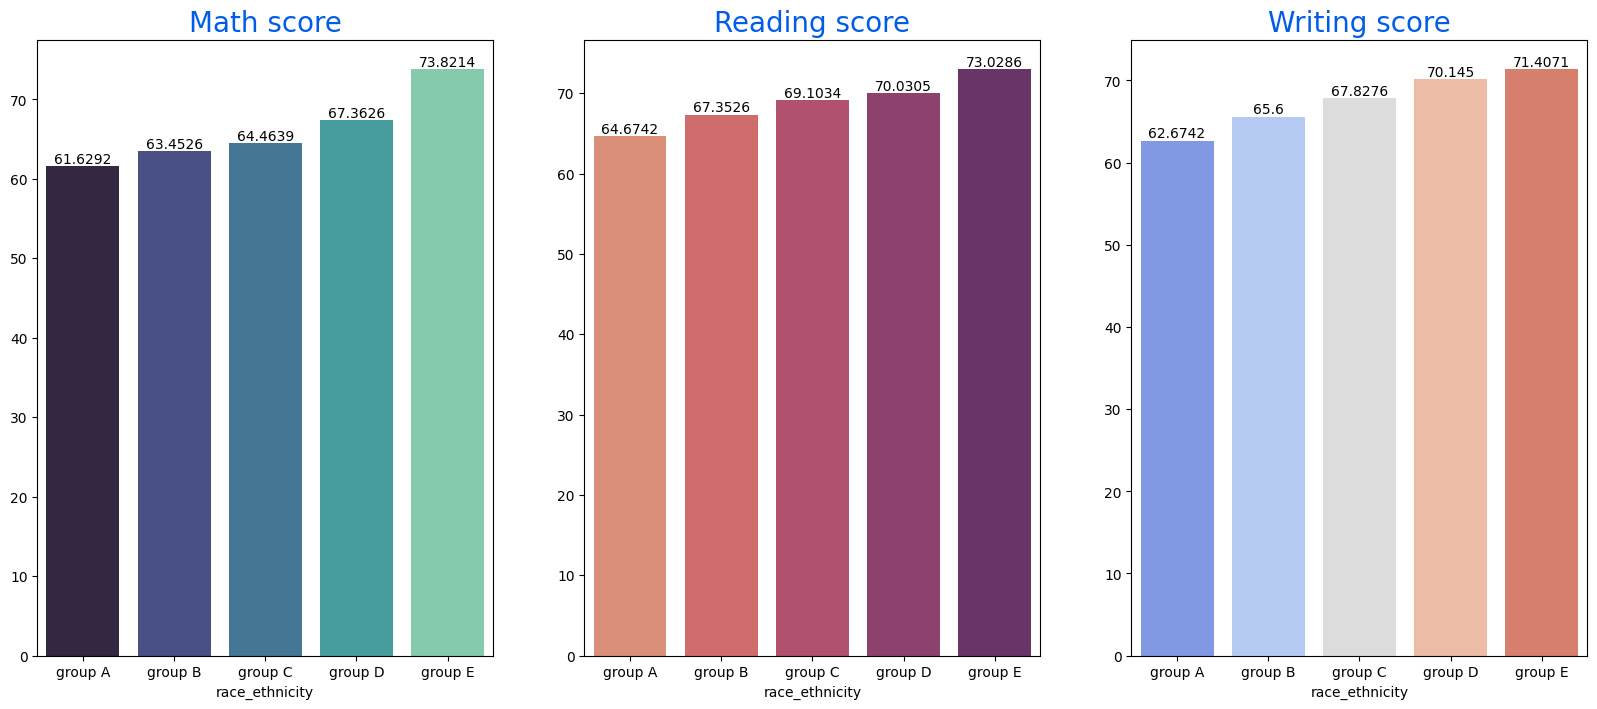

In [29]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)


sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10)


sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10)


Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

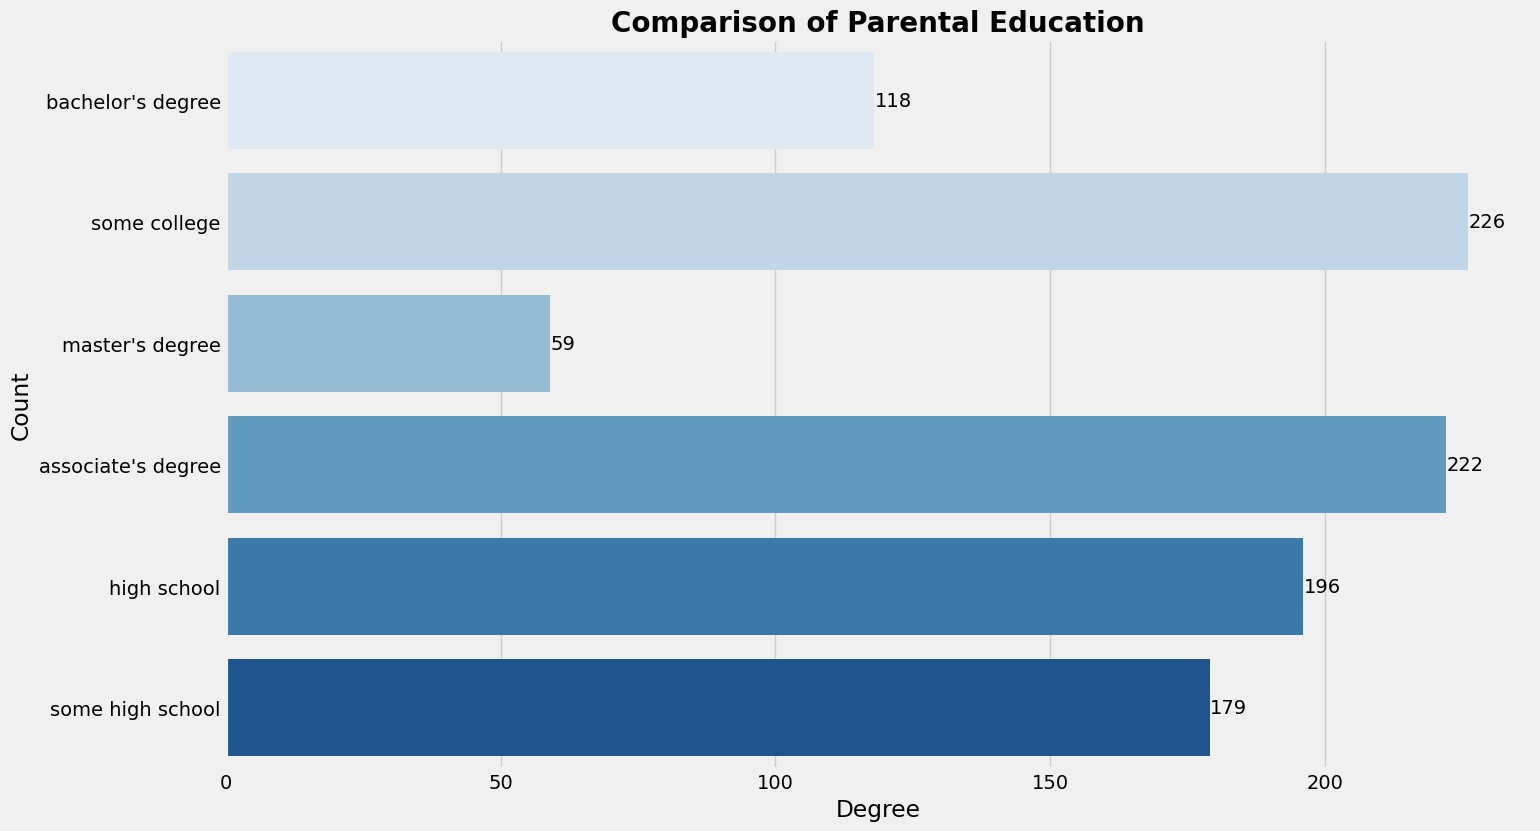

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()  # Create a single subplot, so `ax` is not an array

# Create the count plot with the specified axis
sns.countplot(df['parental_level_of_education'], palette='Blues', ax=ax)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, color='black')

# Set the title and labels
ax.set_title('Comparison of Parental Education', fontweight='bold', fontsize=20)
ax.set_xlabel('Degree')
ax.set_ylabel('Count')

# Show the plot
plt.show()

Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [47]:
group=df.groupby('parental_level_of_education').mean(numeric_only=True)
group

,math_score,reading_score,writing_score,total score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


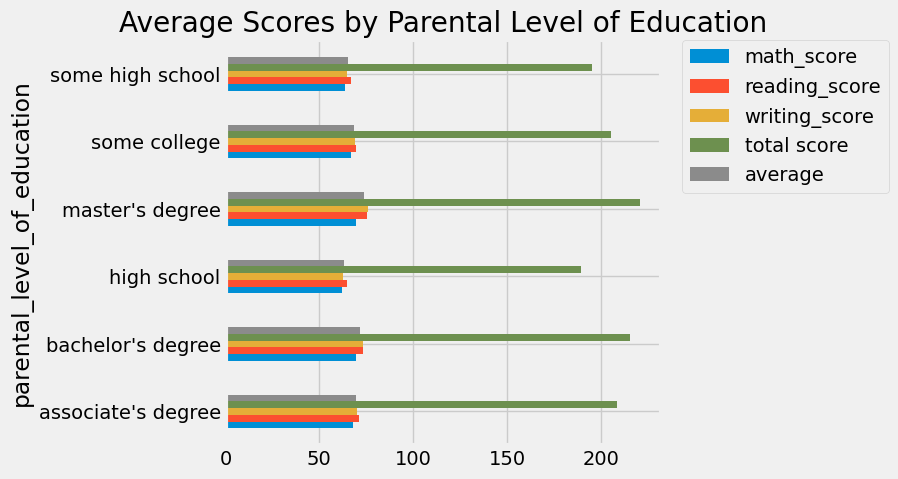

In [72]:
df.groupby('parental_level_of_education').agg('mean',numeric_only=True).plot(kind='barh',figsize=(5,5))
plt.legend( bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.) #(1.05, 1) places the legend slightly outside the right side of the plot, at the top. loc=2 corresponds to the upper-left corner of the legend box.
plt.title('Average Scores by Parental Level of Education')
plt.show()

Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


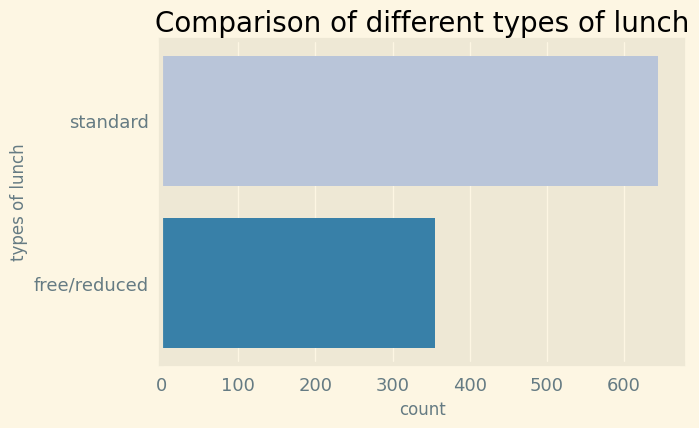

In [80]:
plt.rcParams['figure.figsize'] = (6, 4)
print(plt.style.available)
plt.style.use('Solarize_Light2')

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.ylabel('types of lunch')
plt.xlabel('count')
plt.show()

Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [82]:
group_lunch=df.groupby(['lunch']).mean(numeric_only=True)
group_lunch

,math_score,reading_score,writing_score,total score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


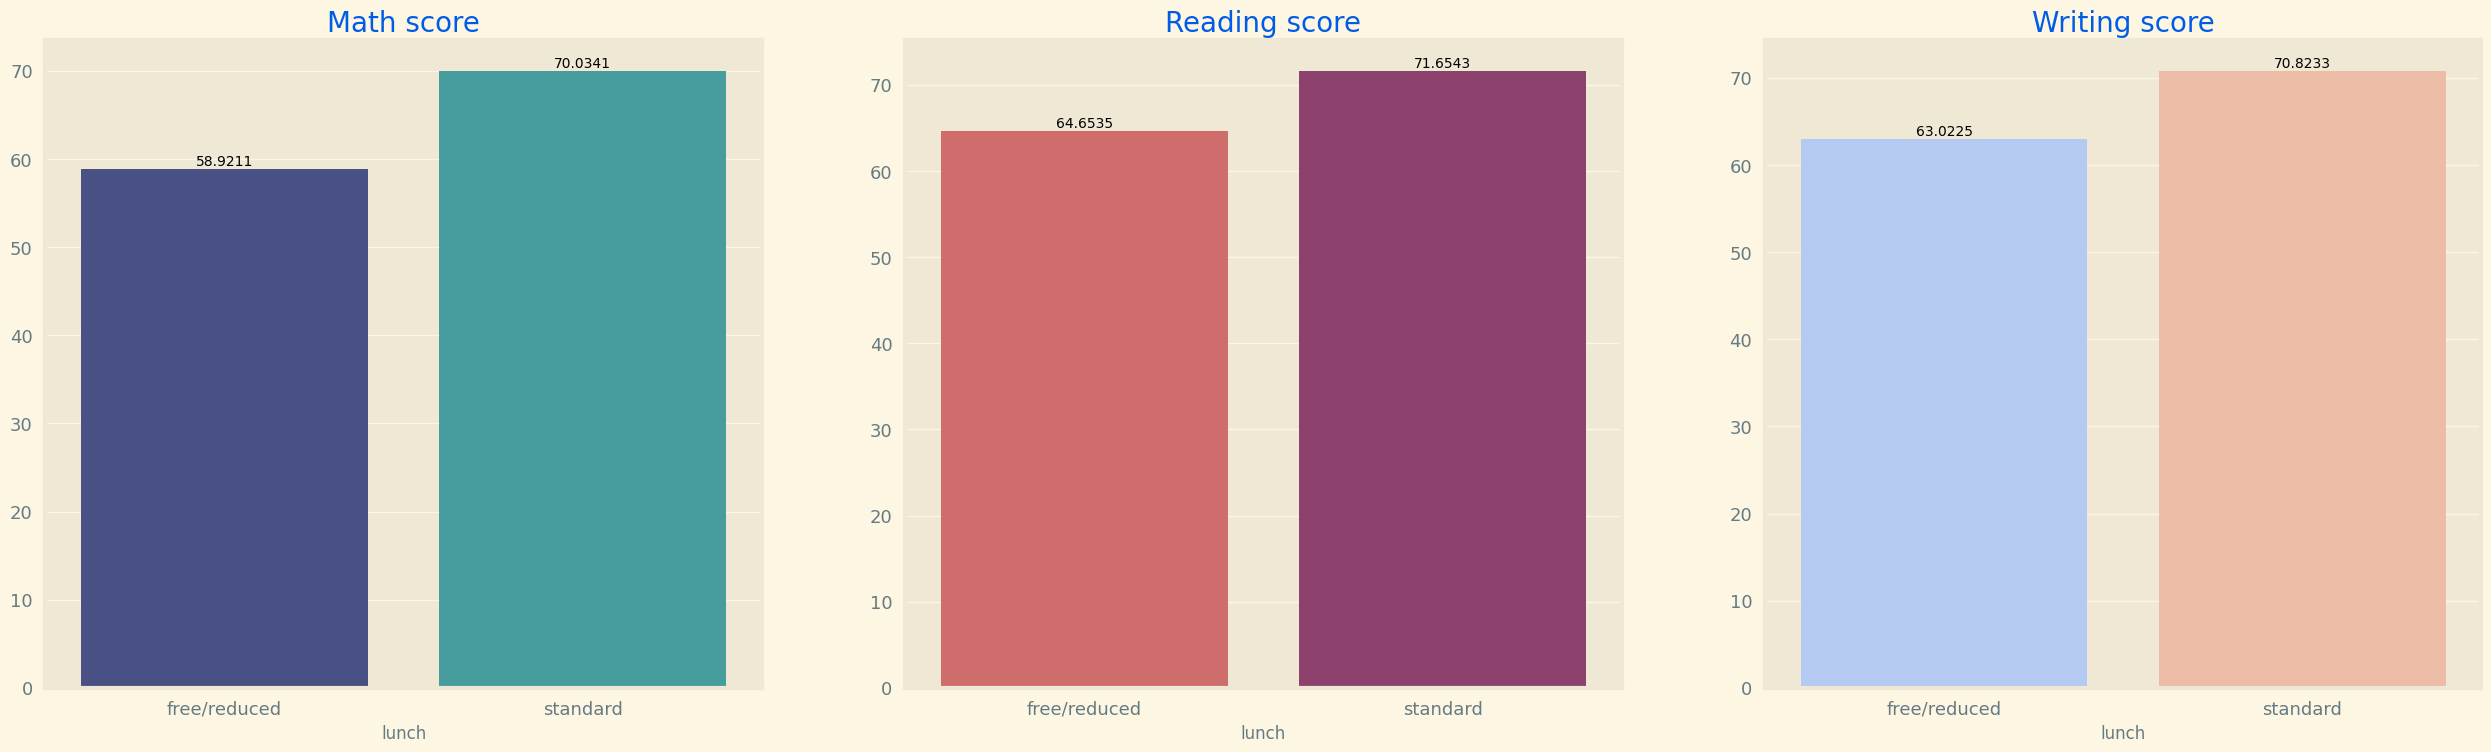

In [86]:
f,ax=plt.subplots(1,3,figsize=(28,8))
sns.barplot(x=group_lunch['math_score'].index,y=group_lunch['math_score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)


sns.barplot(x=group_lunch['reading_score'].index,y=group_lunch['reading_score'].values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10)


sns.barplot(x=group_lunch['writing_score'].index,y=group_lunch['writing_score'].values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10)

insights:
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- How is distribution of test preparation course
- Is Test prepration course has any impact on student's performance ?

#### UNIVARIATE ANALYSIS (How is distribution of test preparation course)

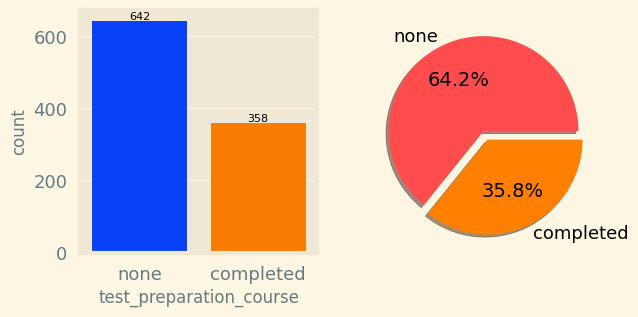

In [88]:
f,ax=plt.subplots(1,2,figsize=(6,3))
sns.countplot(x=df['test_preparation_course'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=8)
    
plt.pie(x=df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().index,explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

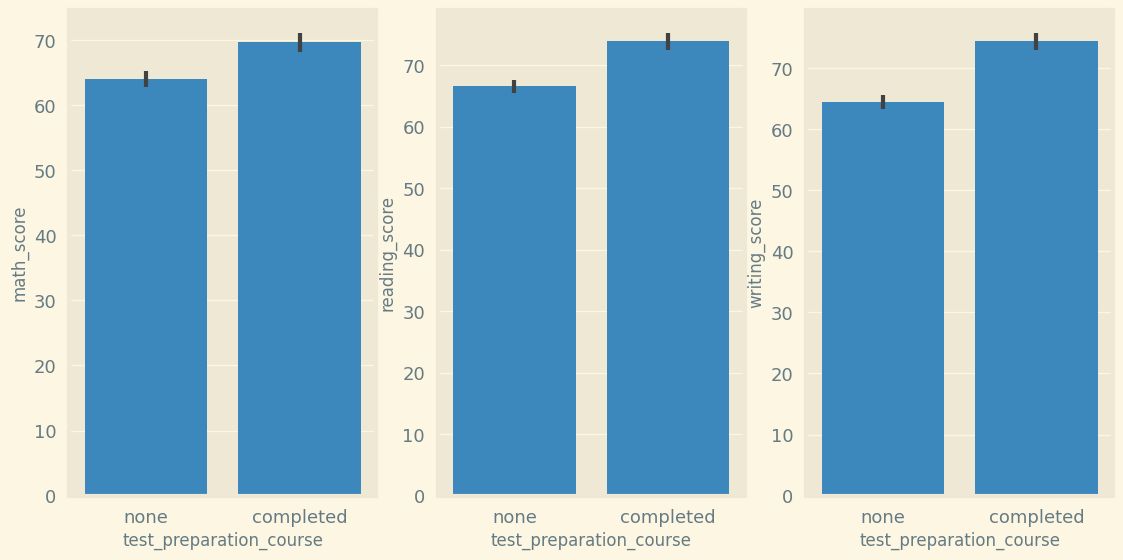

In [94]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'])
plt.subplot(1,3,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'])
plt.subplot(1,3,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'])

 Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

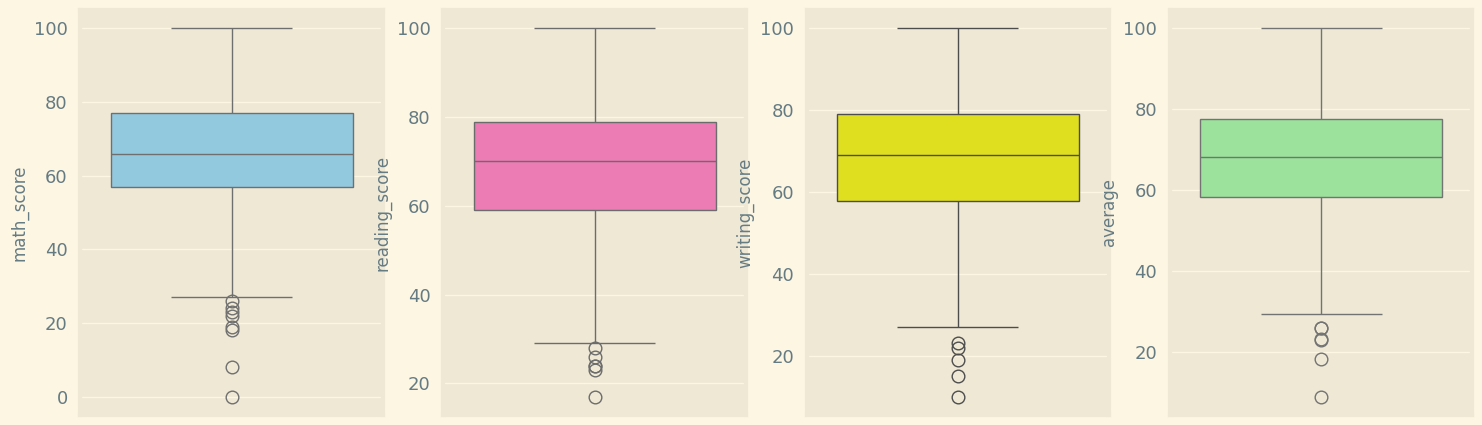

In [96]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

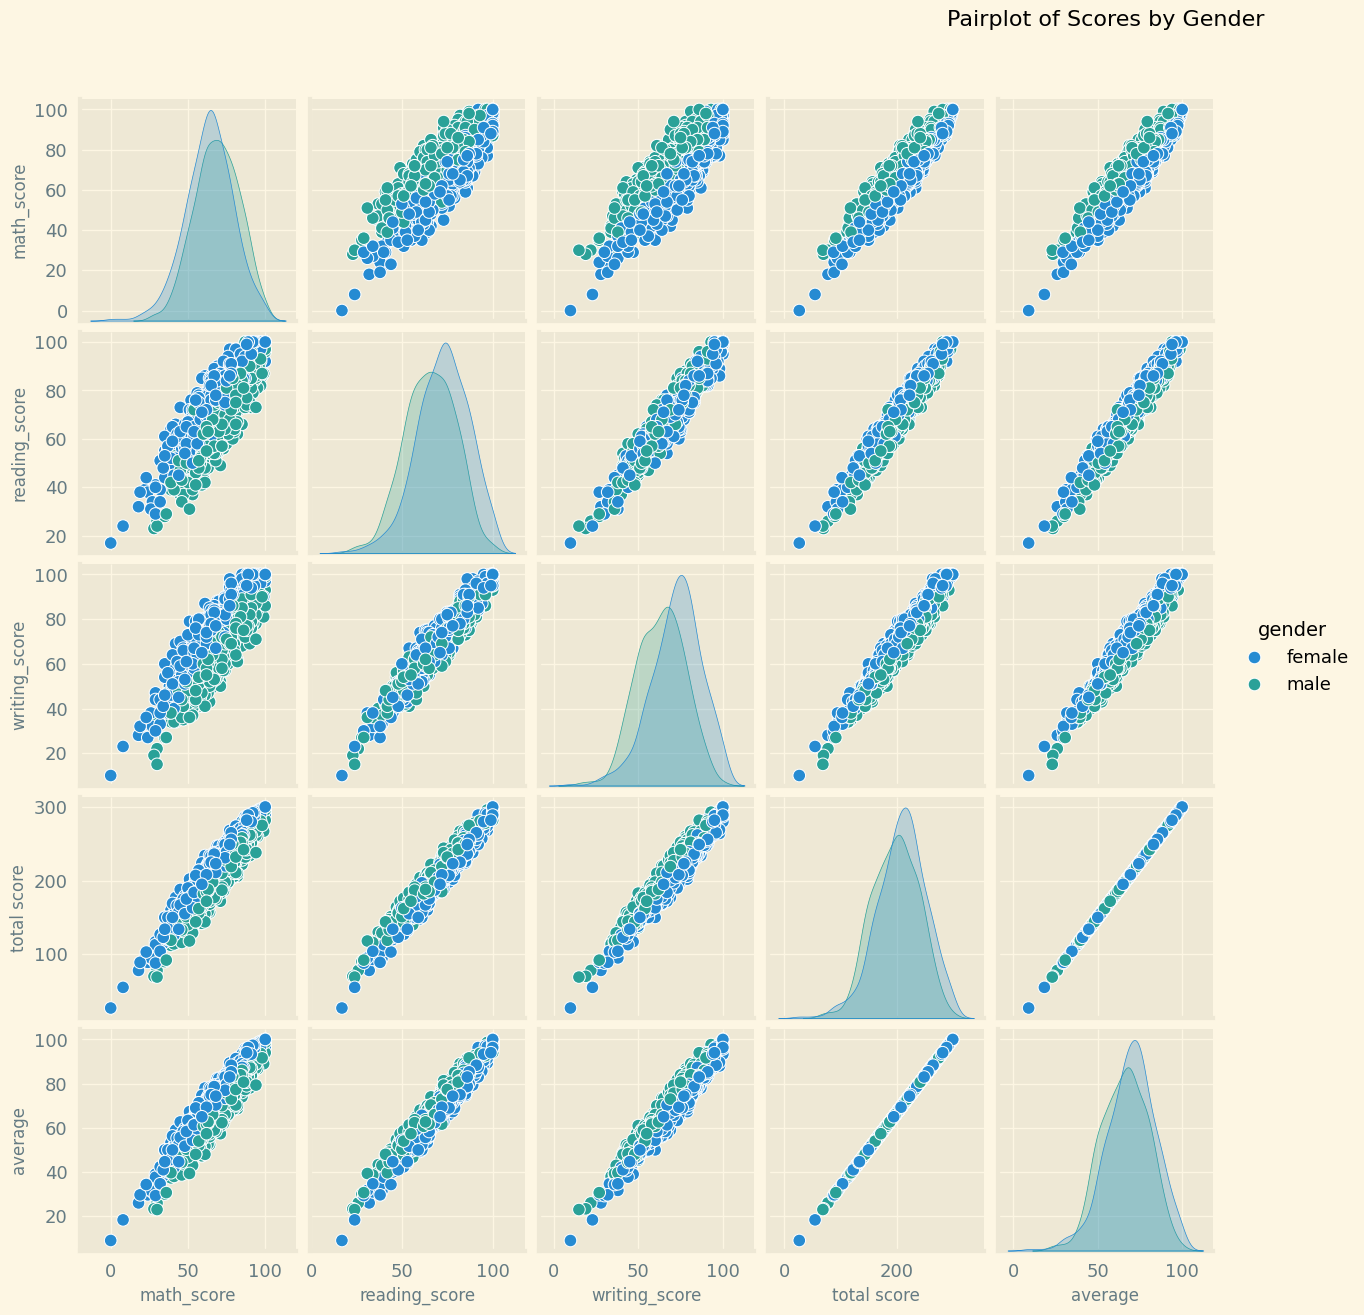

In [107]:
sns.pairplot(df,hue = 'gender')
plt.title("Pairplot of Scores by Gender",y=5.5)
plt.show()

Insights
- From the above plot it is clear that all the scores increase linearly with each other.

## 5) Conclusions
- Student performance is related to lunch, race, and parental level of education.
- Females lead in pass percentage and are also top scorers.
- Completing a test preparation course is beneficial.